In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos


In [4]:
for item in data_root.iterdir():
  print(item)

/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/roses
/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/sunflowers
/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/daisy
/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/dandelion
/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/tulips
/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/LICENSE.txt


In [4]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [6]:
all_image_paths[:10]

['/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/daisy/3504430338_77d6a7fab4_n.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/dandelion/3357432116_b3dce6fed3_n.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/daisy/12891819633_e4c82b51e8.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/roses/16209331331_343c899d38.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/roses/16316557109_7fc55c1cbc_m.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/daisy/14354051035_1037b30421_n.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/dandelion/4624036600_11a4744254_n.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/dandelion/8058286066_acdf082487_n.jpg',
 '/Users/alejandrosanchezaristizabal/.keras/datasets/flower_ph

In [5]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [6]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

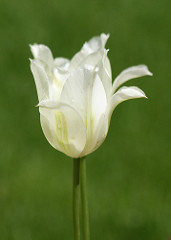

Image (CC BY 2.0)  by Beckwith-Zink (Diane)



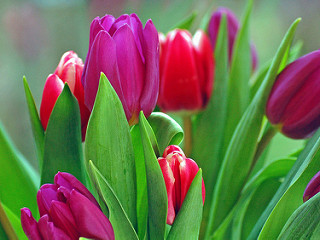

Image (CC BY 2.0)  by DncnH



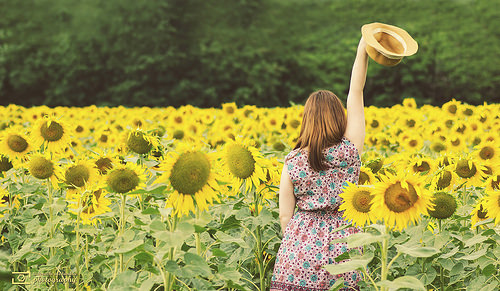

Image (CC BY 2.0)  by Alexandru Tudorache



In [9]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [7]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [9]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [3, 4, 0, 1, 2, 4, 1, 4, 1, 2]


In [13]:
img_path = all_image_paths[0]
img_path

'/Users/alejandrosanchezaristizabal/.keras/datasets/flower_photos/daisy/3504430338_77d6a7fab4_n.jpg'

In [14]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [15]:
# Decodes it into an image tensor.
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(204, 320, 3)
<dtype: 'uint8'>


In [16]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final / 255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [10]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [11]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

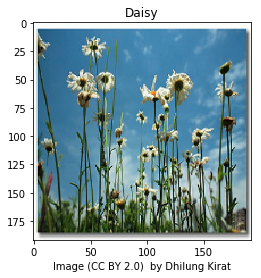

In [21]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [12]:
# Dataset of strings.
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [13]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [14]:
# Dataset that loads and formats images on the fly.
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

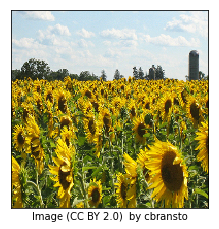

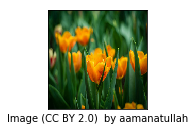

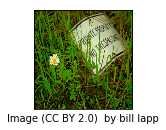

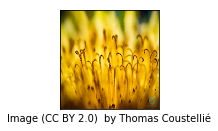

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [17]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [18]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

sunflowers
tulips
daisy
dandelion
roses
tulips
dandelion
tulips
dandelion
roses


In [20]:
# Get a dataset of (image, label) pairs.
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [21]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [22]:
# An alternative to tf.data.dataset.Dataset.zip is to slice the pair of arrays.
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function.
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

- To train a model with this dataset you will want the data:

	- To be well shuffled.
	- To repeat forever.
	- To be batched.
	- Batches to be available as soon as possible.

In [23]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# 'prefetch' lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

- A .shuffle() after a .repeat() would shuffle items across epoch boundaries (some items will be seen twice before others are seen at all).

- A .shuffle() after a .batch() would shuffle the order of the batches, but not shuffle the items across batches.

- The shuffle buffer is filled before any elements are pulled from it. So a large buffer_size may cause a delay when your Dataset is starting.

- The shuffeled dataset doesn't report the end of a dataset until the shuffle-buffer is completely empty. The Dataset is restarted by .repeat(), causing another wait for the shuffle-buffer to be filled.

In [24]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))  # Single operation.
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [25]:
# Without using the FC layer on top.
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable = False

In [26]:
# Before passing data to the MobilNet model, we need to convert the input from a range of [0,1] to [-1,1].
def change_range(image, label):
  return 2*image-1, label

keras_ds = ds.map(change_range)

In [27]:
image_batch, label_batch = next(iter(keras_ds))

In [28]:
# The MobileNet returns a 6x6 spatial grid of features for each image.
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [29]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names))])

In [30]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -2.181096
max logit: 1.9375933

Shape: (32, 5)


In [31]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [32]:
# There are 2 trainable variables: the Dense weights and bias.
len(model.trainable_variables)

2

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
steps_per_epoch = tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch  # Number of batches that form the entire data set.

115.0

In [35]:
model.fit(ds, epochs=1, steps_per_epoch=3)

1/3 [=========>....................] - ETA: 49s - loss: 9.4355 - accuracy: 0.1562

2/3 [===================>..........] - ETA: 13s - loss: 8.8219 - accuracy: 0.2500

3/3 [==============================] - 29s 10s/step - loss: 9.0716 - accuracy: 0.2604


- For GPU and distributed training use Cache and TFRecord File.

In [36]:
# Checks the performance of our datasets.
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
  overall_start = time.time()
  # Fetch a single batch to prime the pipeline (fill the shuffle buffer),
  # before starting the timer.
  it = iter(ds.take(steps+1))
  next(it)

  start = time.time()
  for i,(images,labels) in enumerate(it):
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  # Seconds for extracting the given number of batches.
  print("{} batches: {} s".format(steps, duration))
  # Images extracted per second.
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
  # Seconds for initializing the shuffle buffer plus seconds for extracting the 
  # given number of batches.
  print("Total time: {}s".format(end-overall_start))

In [37]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [38]:
timeit(ds)

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


231.0 batches: 34.08279776573181 s
216.88360 Images/s
Total time: 50.091755867004395s


- Use tf.data.Dataset.cache to easily cache calculations across epochs. This is especially performant if the data fits in memory.

- Here the images are cached, after being pre-processed (decoded and resized).

In [39]:
ds = image_label_ds.cache()
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [40]:
timeit(ds)

.

.

.

..

.

.

.

.

.

..

....

.....

...
231.0 batches: 3.807529926300049 s
1941.41613 Images/s
Total time: 24.826235055923462s


In [41]:
# If the data doesn't fit in memory, use a cache file.
ds = image_label_ds.cache(filename="./TF 2.0 Alpha/cache/cache.tf-data")
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [42]:
timeit(ds)

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.
231.0 batches: 14.724716186523438 s
502.01307 Images/s
Total time: 41.141417026519775s


- The cache file has the advantage that it can be used to quickly restart the dataset without rebuilding the cache. Note how much faster it is the second time:

In [43]:
timeit(ds)

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


231.0 batches: 8.329280853271484 s
887.47158 Images/s
Total time: 13.111011028289795s


In [45]:
# TFRecord files are a simple format to store a sequence of blobs.
image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter("./TF 2.0 Alpha/tf_records/images.tfrec")
tfrec.write(image_ds)

In [46]:
image_ds = tf.data.TFRecordDataset("./TF 2.0 Alpha/tf_records/images.tfrec").map(preprocess_image)

In [47]:
ds = tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [48]:
timeit(ds)
# This is slower than the cache version because we have not cached the preprocessing.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


231.0 batches: 26.84098792076111 s
275.39970 Images/s
Total time: 43.82373309135437s


- To save some preprocessing to the TFRecord file, first make a dataset of the processed images.

In [49]:
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = paths_ds.map(load_and_preprocess_image)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

- Now instead of a dataset of .jpeg strings, this is a dataset of tensors.

- To serialize this to a TFRecord file, you first convert the dataset of tensors to a dataset of strings.

In [50]:
ds = image_ds.map(tf.io.serialize_tensor)
ds

<MapDataset shapes: (), types: tf.string>

In [51]:
tfrec = tf.data.experimental.TFRecordWriter("./TF 2.0 Alpha/tf_records/images_2.tfrec")
tfrec.write(ds)

In [52]:
# With the preprocessing cached, data can be loaded from the TFrecord file quite 
# efficiently. Just remember to de-serialized tensor before trying to use it.

ds = tf.data.TFRecordDataset("./TF 2.0 Alpha/tf_records/images_2.tfrec")

def parse(x):
  result = tf.io.parse_tensor(x, out_type=tf.float32)
  result = tf.reshape(result, [192, 192, 3])
  return result

ds = ds.map(parse, num_parallel_calls=AUTOTUNE)
ds

<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>

In [53]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [54]:
timeit(ds)

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


231.0 batches: 12.059852838516235 s
612.94280 Images/s
Total time: 18.921138048171997s
